# 다음 분기에 어떤 게임을 설계해야 할까


- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
- 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

## 데이터 전처리

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#from google.colab import drive
#drive.mount('/content/drive')

In [39]:
#filename = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
filename = 'https://blog.kakaocdn.net/dn/KyWvP/btra6H4gxrB/xVs8pOjtUUo46Hx4jSqhGk/vgames2.csv?attach=1&knm=tfile.csv'
df = pd.read_csv(filename)

In [40]:
print(df.shape)
df.isnull().sum()

(16598, 10)


Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [41]:
# 전체 데이터에서 약 2% 소실, but 데이터를 해석하는데 중요한 척도가 될 데이터들이라 생각치 않음.
# 내가 필요한 데이터는 최근 게임 동향이다. 따라서 데이터가 소실된 것들은 옛것 이거나, 동향을 파악하는데 중요하지 않다고 판단하여 삭제함.
df = df.dropna()
df.shape

(16241, 10)

In [42]:
def del_str(x):               # 출고량의 단위(K, M) 제거 및 단위 맞춤
  if 'K' in x:
    x = x.replace('K','')
    x = float(x)
    return x/1000
  elif 'M' in x:
    x = x.replace('M','')
    return float(x)
  else:
    return float(x)

sell_colums = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for name in sell_colums:
  df[name] = df[name].apply(del_str)

In [43]:
df['Year'] = df['Year'].astype(int)
#df = df[df['Year'] >= 1900]
#df.shape

In [44]:
def plus_2000(x):
  if x < 1900 :
    if x > 21:
      return x + 1900
    else :
      return x + 2000
  else : 
    return x
  
df['Year']= df['Year'].apply(plus_2000)

In [45]:
df = df.rename(columns={"Unnamed: 0": "Number"})
df = df.set_index('Number')

In [46]:
df = df[df['Year'] >= 2006]

In [47]:
print(df.shape)
df.head()

(10171, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Number,,,,,,,,,
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [48]:
#df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']] = StandardScaler().fit_transform(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']])

## X = Genre 

- 장르별 total 출고량
- 각 지역에서 장르별 출고량
- 장르별 시장 점유율

In [49]:
#장르별 출고량


Genre_Sales = df.groupby(['Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

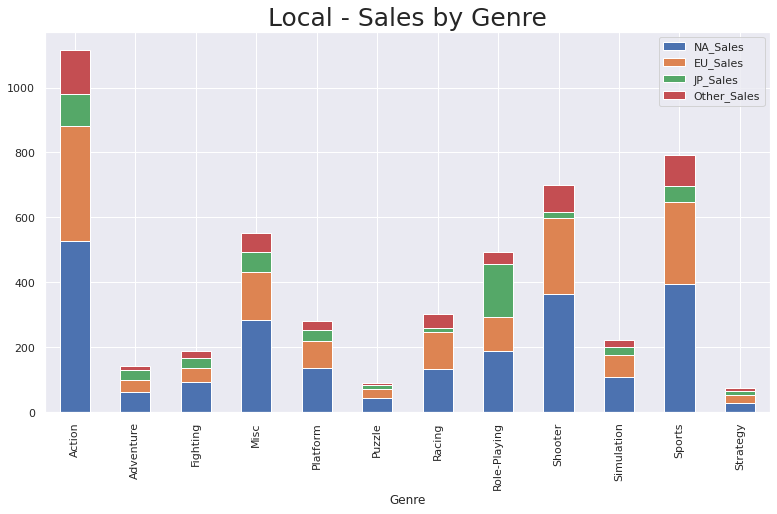

In [50]:
sns.set(rc = {'figure.figsize':(13,8)})
Genre_Sales.plot.bar(stacked=True, figsize=(13,7))
plt.title('Local - Sales by Genre', fontsize=25)

#plt.savefig('Local - Sales by Genre.jpg')
plt.show()

In [51]:
Genre_Sales['Total'] = Genre_Sales.sum(axis=1)

In [52]:
df_duplicate = df.drop_duplicates(['Name'])                                     # 장르별 출시 수
count_Genre = df_duplicate['Genre'].value_counts()
count_Genre = pd.DataFrame(count_Genre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


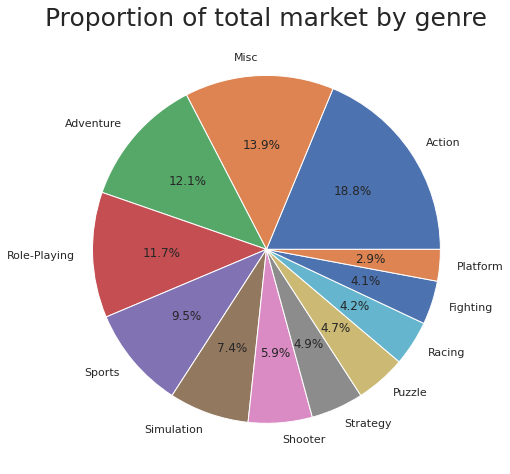

In [53]:
label = ['Action', 'Misc', 'Adventure', 'Role-Playing', 'Sports', 'Simulation',
       'Shooter', 'Strategy', 'Puzzle', 'Racing', 'Fighting', 'Platform']
count_Genre = count_Genre/(count_Genre.sum())
plt.pie(count_Genre, labels=label, autopct='%.1f%%')
plt.title('Proportion of total market by genre', fontsize=25)

#plt.savefig('Proportion of total market by genre.jpg')
plt.show()

## X = 플랫폼
- 플랫폼 별 매출액
- 플랫폼 별 장르


In [54]:
#플랫폼과 매출액 간의 연관성 (귀무가설 : 연관없다.)

Platform_Sales = df.groupby(['Platform'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

stat, pvalue, dof, expected = chi2_contingency(Platform_Sales)      
Platform_Sales['Total'] = Platform_Sales.sum(axis=1)
Platform_Sales = Platform_Sales.sort_values('Total', ascending=False)
Platform_Sales.head(10)                                                         # X360, PS3는 나온지 오래 되었으니 최신판으로 적용, Wii, DS는 닌텐도 기반이니까
                                                                                # 결국 PS4나 Xbox의 최신 그리고 PC로 출시하는게 맞음.

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Platform,,,,,
X360,586.89,277.39,12.01,83.99,960.28
PS3,388.00,339.71,78.56,140.47,946.74
Wii,495.10,260.78,65.79,78.48,900.15
DS,331.18,148.02,141.44,47.97,668.61
PS4,95.80,122.94,14.04,43.00,275.78
PS2,112.60,46.22,33.58,66.32,258.72
PSP,80.29,55.53,70.58,33.87,240.27
3DS,72.86,54.24,92.96,11.76,231.82
PC,43.22,96.52,0.00,20.76,160.50


In [55]:
Platform_Sales = Platform_Sales.reset_index()
Platform_Sales = Platform_Sales.drop('Total',axis=1)
tidy_Platform_Sales = pd.melt(Platform_Sales, ['Platform'], var_name='Local', value_name='Sales')

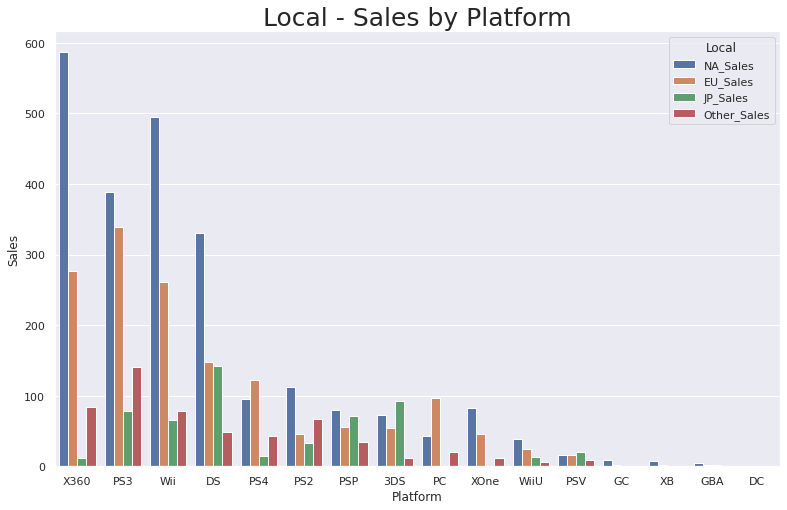

In [56]:
sns.barplot(data=tidy_Platform_Sales, x='Platform', y='Sales', hue='Local')
plt.title('Local - Sales by Platform', fontsize=25)

#plt.savefig('Local - Sales by Platform.jpg')
plt.show()

## X = 퍼블리셔
- 퍼블리셔 별 게임 출시 수
- 퍼블리셔 별 총 출고량

In [57]:
# 퍼블리셔 별 총 장르 출시 수

Publisher_Genre = df_duplicate.loc[:,['Publisher','Genre']]
cross_Publisher_Genre = pd.crosstab(Publisher_Genre['Publisher'],Publisher_Genre['Genre'])

In [58]:
cross_Publisher_Genre['Genre_Total'] = cross_Publisher_Genre.sum(axis=1)
Rank_Publisher_Genre = cross_Publisher_Genre.sort_values('Genre_Total',ascending=False)
Rank_Publisher_Genre_20 = Rank_Publisher_Genre.iloc[0:20,:]
Rank_Publisher_Genre_20 = Rank_Publisher_Genre_20[['Genre_Total']]
Rank_Publisher_Genre_20 = Rank_Publisher_Genre_20.reset_index()

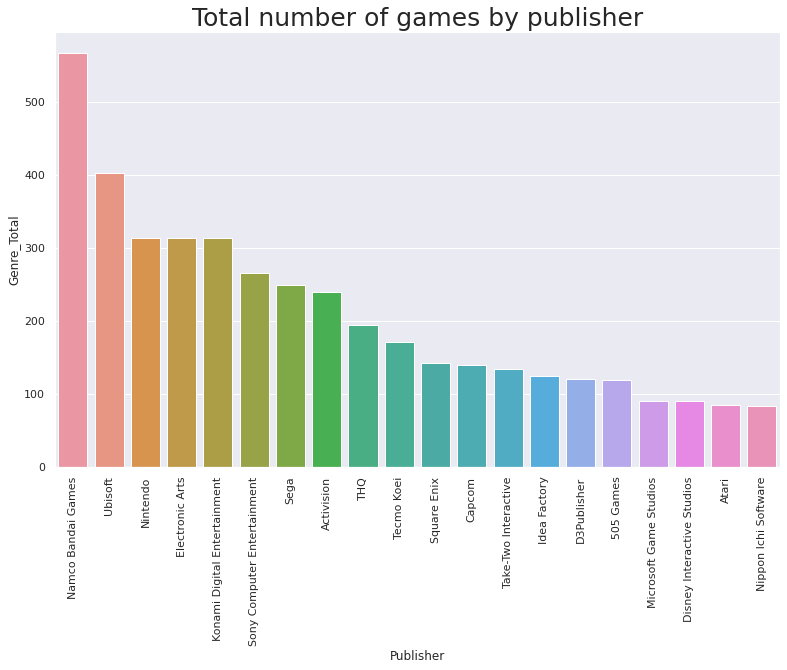

In [59]:
plt.xticks(rotation = 90 )
sns.barplot(data = Rank_Publisher_Genre_20, x = 'Publisher', y='Genre_Total')
plt.title('Total number of games by publisher', fontsize=25)
#plt.savefig('Total number of games by publisher.jpg')
plt.show()

In [60]:
# 퍼블리셔 별 매출액

Publisher_Sales = df.groupby(['Publisher'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Publisher_Sales['Total_Sales'] = Publisher_Sales.sum(axis=1)
Publisher_Sales = Publisher_Sales.reset_index()

In [61]:
Publisher_Total_Sales = Publisher_Sales.groupby(['Publisher'])[['Total_Sales']].sum()
Publisher_Total_Sales = Publisher_Total_Sales.sort_values('Total_Sales', ascending=False)
Publisher_Total_Sales_20 = Publisher_Total_Sales.iloc[0:20,:]
Publisher_Total_Sales_20 = Publisher_Total_Sales_20.reset_index()

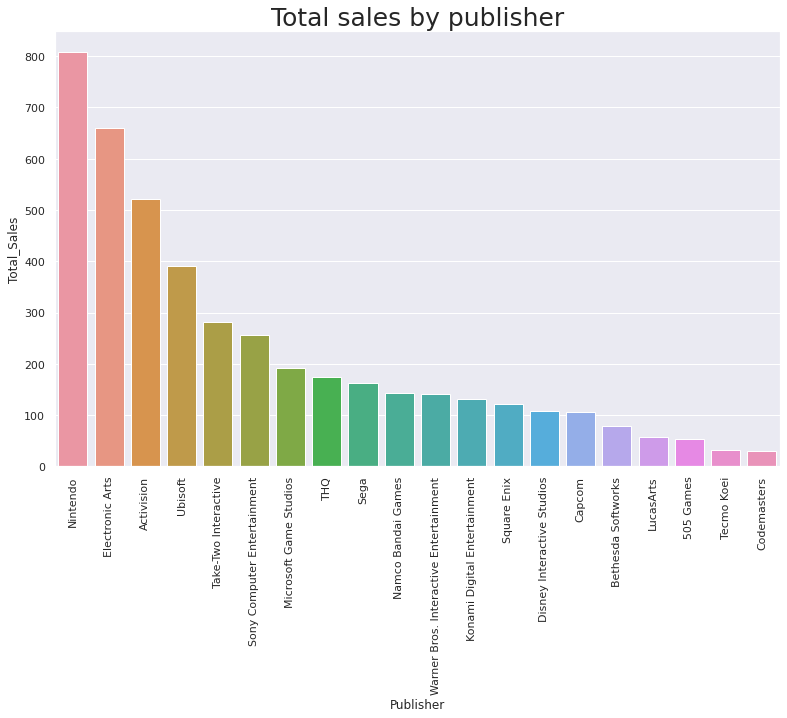

In [62]:
plt.xticks(rotation = 90 )
sns.barplot(data = Publisher_Total_Sales_20, x = 'Publisher', y='Total_Sales')
plt.title('Total sales by publisher', fontsize=25)

#plt.savefig('Total sales by publisher.jpg')
plt.show()

In [63]:
# 퍼블리셔 별 장르 출시 수, 출고량 top 20 비교

Rank_Publiser_Genre = Rank_Publisher_Genre_20['Publisher']
Rank_Publiser_Sales = Publisher_Total_Sales_20['Publisher']

A = pd.concat([Rank_Publiser_Genre,Rank_Publiser_Sales], axis=1)
A.columns = ['Rank_Publiser_Genre', 'Rank_Publiser_Sales']
one_to_twoten = pd.DataFrame(range(1,21))
A = pd.concat([A,one_to_twoten], axis=1)
A = A.set_index(0)
A

,Rank_Publiser_Genre,Rank_Publiser_Sales
0,,
1,Namco Bandai Games,Nintendo
2,Ubisoft,Electronic Arts
3,Nintendo,Activision
4,Electronic Arts,Ubisoft
5,Konami Digital Entertainment,Take-Two Interactive
6,Sony Computer Entertainment,Sony Computer Entertainment
7,Sega,Microsoft Game Studios
8,Activision,THQ
9,THQ,Sega


## X = Year
- 연도별 장르 추이
- 연도별 총 출고량 추이

In [64]:
#연도별 장르 추이

Year_Genre = pd.crosstab(df_duplicate['Year'],df_duplicate['Genre'])
Year_Genre['Total'] = Year_Genre.sum(axis=1)
Rank_Year_Genre = Year_Genre.sort_values('Total',ascending=False)
Year_Genre = Year_Genre.drop([2017,2020]) 

In [65]:
tidy_Year_Genre = Year_Genre.drop(columns='Total')
tidy_Year_Genre = tidy_Year_Genre.reset_index()
tidy_Year_Genre = pd.melt(tidy_Year_Genre,['Year'], var_name='Genre', value_name='Genre_volume')

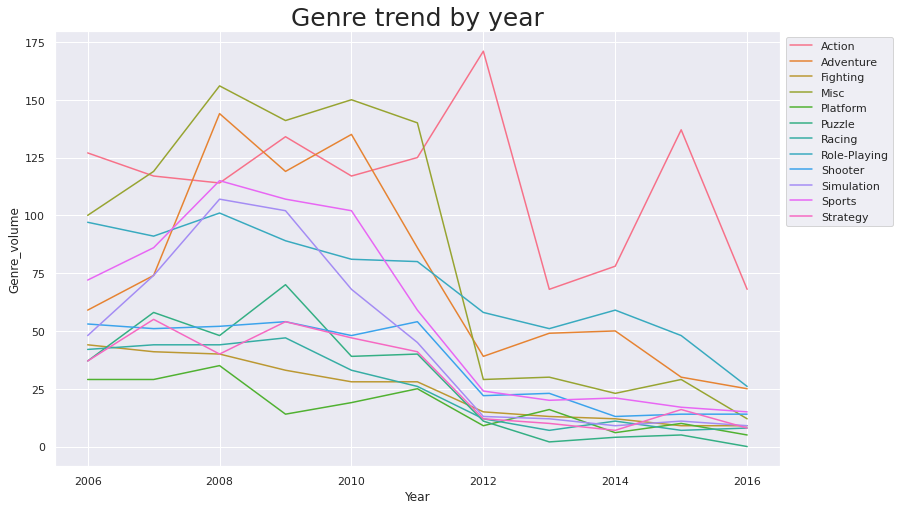

In [66]:
sns.lineplot(data=tidy_Year_Genre, x='Year', y='Genre_volume', hue='Genre')
plt.title('Genre trend by year', fontsize=25)
plt.legend(loc = 2, bbox_to_anchor = (1,1))

#plt.savefig('Genre trend by year.jpg')
plt.show()

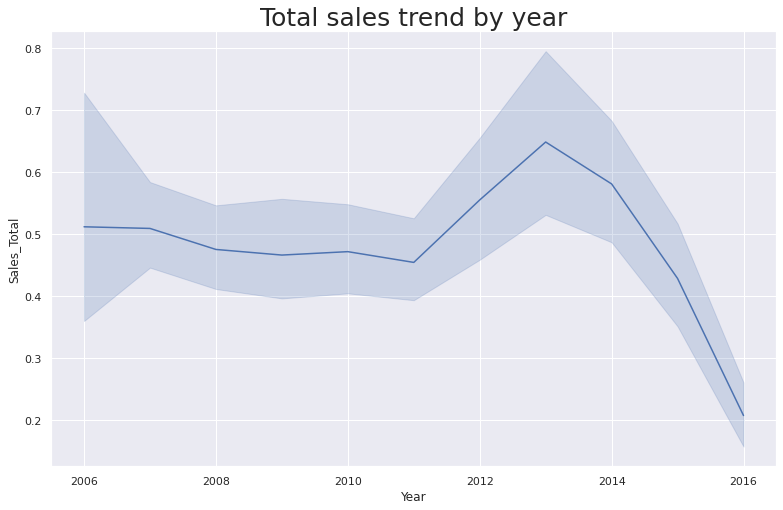

In [30]:
# 연도별 출고량 총액

df['Sales_Total'] = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis=1)
Year_Sales = pd.concat([df['Year'],df['Sales_Total']],axis=1)
Year_Sales = Year_Sales[Year_Sales['Year'] <= 2016]
plt.title('Total sales trend by year', fontsize=25)
sns.lineplot(data=Year_Sales, x='Year', y='Sales_Total')

#plt.savefig('Total sales trend by year.jpg')
plt.show()

## 매출액이 높은 게임 분석

In [67]:
df2 = df
df2['Sales_Total'] = df2[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

In [32]:
df2 = df2.sort_values('Sales_Total', ascending=False)
df2.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
Number,,,,,,,,,,
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3436,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
10900,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4344,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


In [33]:
df2_10 = df2.iloc[0:10, :]
Genre_counts= pd.DataFrame(df2_10['Genre'].value_counts())
Publisher_counts_10 = pd.DataFrame(df2_10['Publisher'].value_counts())
Platform_counts_10 = pd.DataFrame(df2_10['Platform'].value_counts())
#df2_10 = df2_10.reset_index(inplace=False)
df2_10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Total
Number,,,,,,,,,,
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
12580,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3353,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6938,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3015,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16532,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3436,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
10900,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4344,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


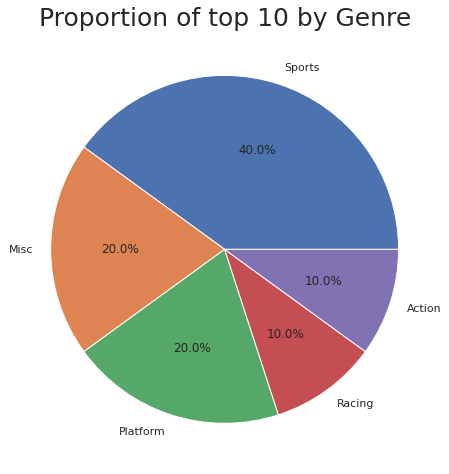

In [34]:
label = ['Sports', 'Misc', 'Platform', 'Racing', 'Action']
plt.pie(Genre_counts, labels=label, autopct='%.1f%%')
plt.title('Proportion of top 10 by Genre', fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


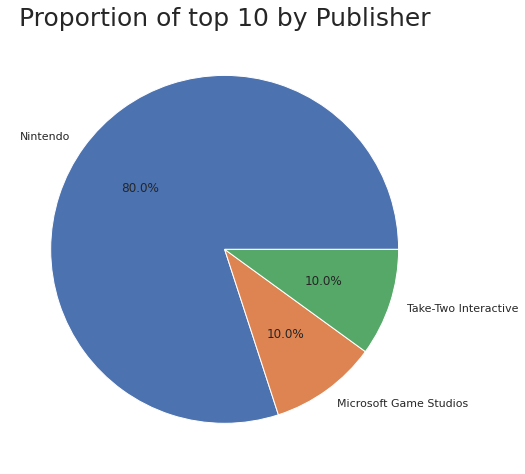

In [35]:
label = ['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive']
plt.pie(Publisher_counts_10, labels=label, autopct='%.1f%%')
plt.title('Proportion of top 10 by Publisher', fontsize=25)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


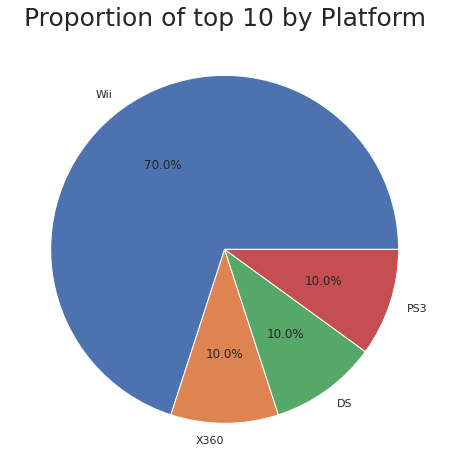

In [36]:
label = ['Wii', 'X360', 'DS', 'PS3']
plt.pie(Platform_counts_10, labels=label, autopct='%.1f%%')
plt.title('Proportion of top 10 by Platform', fontsize=25)
plt.show()

In [37]:
'''
1. 탑 10안에서 닌텐도가 8개이다.
2. 스포츠, 플랫폼, 레이싱, 기타 순서이다.
3. 북미의 매출이 가장 많다.
4. 닌텐도 위가 가장 많은 플랫폼이다.
'''

'\n1. 탑 10안에서 닌텐도가 8개이다.\n2. 스포츠, 플랫폼, 레이싱, 기타 순서이다.\n3. 북미의 매출이 가장 많다.\n4. 닌텐도 위가 가장 많은 플랫폼이다.\n'